In [12]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam ,SGD
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf

import cv2
import os

import numpy as np


In [14]:
labels = ['Chapman', 'Cockcroft', 'Library', 'Maxwell', 'Media_City_Campus', 'New_Adelphi', 'New_Science', 'Newton', 'Sports_Center', 'University_House']


In [15]:
labels = ['Chapman', 'Cockcroft', 'Library', 'Maxwell', 'Media_City_Campus', 'New_Adelphi', 'New_Science', 'Newton', 'Sports_Center', 'University_House']

img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
print('here')
train = get_data("C:/Users/jibra/pieas/icv/uos/dataset")



here


C:\Users\jibra\AppData\Local\Temp\ipykernel_28000\1176586527.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


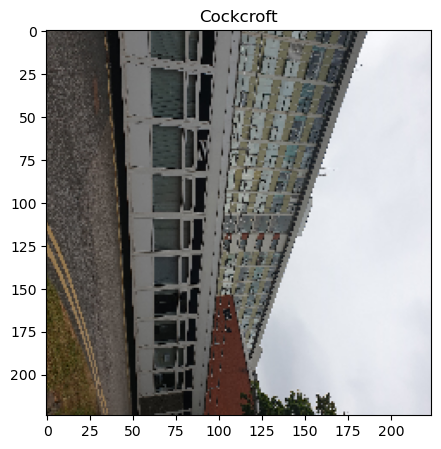

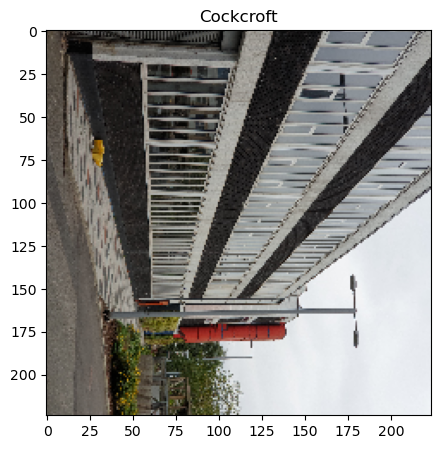

In [17]:

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

train, val = train_test_split(train, test_size=0.2, random_state=25)


x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [18]:
from tensorflow.keras.models import load_model
my_model = load_model('C:/Users/jibra/pieas/icv/Model94%.h5')
my_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, None, None, 512)  4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, None, None, 512)  2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, None, None, 512)   0         
                                                                 
 conv_pw_9 (Conv2D)          (None, None, None, 512)   262144    
                                                                 
 conv_pw_9

In [19]:
my_model.evaluate(x_val, y_val)

4/4 [==============================] - 2s 157ms/step - loss: 0.1214 - accuracy: 0.9917


[0.12136007845401764, 0.9916666746139526]

In [27]:
predictions = my_model.predict(x_val)
Y_pred = predictions
Y_pred_classes = np.argmax(predictions,axis = 1) 
print(Y_pred_classes)
print(y_val)


4/4 [==============================] - 1s 128ms/step
[4 7 4 7 2 7 0 4 1 5 4 3 6 0 4 9 1 6 5 2 4 9 5 3 1 6 4 5 8 2 7 9 4 8 6 2 9
 3 1 0 9 1 0 3 2 6 8 3 9 7 0 6 2 5 2 2 9 0 2 5 2 0 3 5 3 7 5 7 1 7 3 2 5 4
 0 1 6 3 1 1 6 2 8 7 5 6 6 3 4 5 1 7 8 7 2 9 0 8 9 3 7 7 6 1 9 1 7 7 4 3 7
 2 6 3 4 1 6 1 5 0]
[4 7 4 7 2 7 0 4 1 5 4 3 6 0 4 9 1 6 5 2 4 9 5 3 1 6 4 5 8 2 7 9 4 8 6 2 9
 3 1 0 9 1 0 3 2 6 8 3 9 7 0 6 2 5 2 2 9 0 2 5 2 0 3 5 3 7 5 7 1 7 3 2 5 4
 0 1 6 3 1 1 6 2 8 7 5 6 6 3 4 5 1 7 8 7 2 9 0 9 9 3 7 7 6 1 9 1 7 7 4 3 7
 2 6 3 4 1 6 1 5 0]


In [28]:
coords = [[53.48765075617312, -2.2748258018463816], [53.486144,-2.2732329],[53.487376, -2.272849], [53.485193939065006, -2.2706789766950846], 
          [53.473298621033294, -2.296998484648068], [53.48675453128888, -2.2745663476307167], [53.48837637970398, -2.274583715369131],
          [53.486126688337755, -2.2740041558451054],[53.48992703125414, -2.2734526278430414], [53.48917607578771, -2.2735923288503397]]
import webbrowser

In [25]:
img_size = 224
def get_data(data_dir):
    data = [] 
    path = os.path.join(data_dir)
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append([resized_arr])
        except Exception as e:
            print(e)
    return np.array(data)
print('here')

test = get_data("C:/Users/jibra/pieas/interface_geoloc/inputs")
#C:\Users\jibra\pieas\interface_geoloc\inputs
print('done')
x_test = []
for feature in test:
  x_test.append(feature)
x_test = np.array(x_test) / 255

x_test.reshape(-1, img_size, img_size, 1)
print(x_test.shape)
predictions = my_model.predict(x_test)
Y_pred_classes = np.argmax(predictions,axis = 1) 
print(labels[Y_pred_classes[0]])
coordinates = coords[Y_pred_classes[0]]
url = f"https://www.google.com/maps/search/?api=1&query={coordinates[0]},{coordinates[1]}"
print(url)
webbrowser.open(url, new=2)

here
done
(1, 1, 224, 224, 3)
1/1 [==============================] - 0s 325ms/step
Media_City_Campus
https://www.google.com/maps/search/?api=1&query=53.473298621033294,-2.296998484648068


True

In [ ]:
coords = [[53.48765075617312, -2.2748258018463816], [53.486144,-2.2732329],[53.487376, -2.272849], [53.485193939065006, -2.2706789766950846], 
          [53.473298621033294, -2.296998484648068], [53.48675453128888, -2.2745663476307167], [53.48837637970398, -2.274583715369131],
          [53.486126688337755, -2.2740041558451054],[53.48992703125414, -2.2734526278430414], [53.48917607578771, -2.2735923288503397]]

In [57]:
predictions = my_model.predict(x_test)
print(predictions)

1/1 [==============================] - 0s 43ms/step
[[3.6847606e-04 2.8312985e-05 6.5207889e-05 1.3961913e-03 9.9320233e-01
  4.4245454e-03 6.0780661e-07 9.8244345e-06 3.5846317e-06 5.0080923e-04]
 [3.9464226e-07 1.1483119e-06 3.7508783e-09 2.0950738e-07 6.0203341e-08
  7.5203452e-08 9.9999791e-01 2.8924509e-09 3.4911270e-08 1.1959648e-07]
 [3.9060513e-05 9.9798185e-01 4.7310125e-05 7.5191329e-04 3.7444325e-04
  4.5537199e-05 2.7230964e-04 1.3310116e-05 1.9334964e-04 2.8080260e-04]
 [9.4650441e-01 2.8973585e-03 8.4162246e-05 1.6234344e-03 2.9721580e-02
  1.3536550e-04 5.7229390e-06 5.6281610e-06 3.4088163e-05 1.8988250e-02]
 [1.7008266e-07 9.9949890e-01 4.7719055e-07 4.2094119e-04 5.5147211e-05
  1.2650300e-05 4.0102909e-06 7.8587163e-07 3.8324642e-06 3.0924029e-06]
 [9.9796975e-01 4.4991713e-04 1.7274560e-04 9.5717364e-04 1.1779810e-04
  9.5623755e-06 8.5433584e-07 5.8634914e-06 2.5644244e-06 3.1378816e-04]
 [1.6212296e-06 1.6174491e-06 3.5819983e-08 1.7408539e-04 1.9193246e-03
  9.97

5
5/5 [==============================] - 1s 153ms/step
[[4.2865980e-12 2.8705743e-11 2.5678344e-09 ... 4.7476700e-10
  4.4907384e-09 2.0086295e-11]
 [1.9241718e-06 1.9080564e-06 2.9456407e-08 ... 8.8650643e-07
  9.8033320e-07 9.9999291e-01]
 [9.9987483e-01 4.4190630e-05 1.6654045e-05 ... 1.6738817e-07
  4.8759639e-06 5.0062081e-05]
 ...
 [6.2299601e-09 9.9998689e-01 5.3326926e-07 ... 3.4203016e-08
  2.2618920e-07 1.1878931e-06]
 [2.7001633e-07 1.9617064e-08 2.7389942e-07 ... 7.4881495e-10
  1.8161618e-08 8.8673353e-09]
 [3.8596481e-05 9.9980384e-01 1.0569049e-06 ... 6.6581983e-05
  3.0975617e-08 6.7369911e-05]]


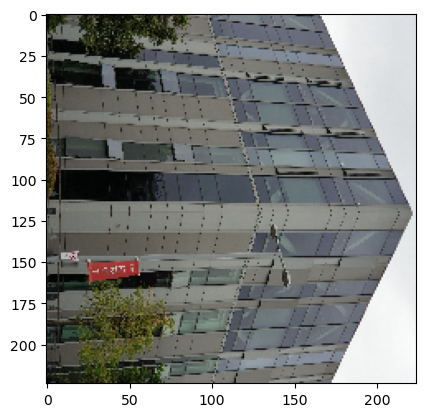

In [25]:
plt.imshow(x_val[0])
print(y_val[0])
predict = my_model.predict(x_val)
print(predict)

IndexError: index 2 is out of bounds for axis 0 with size 2

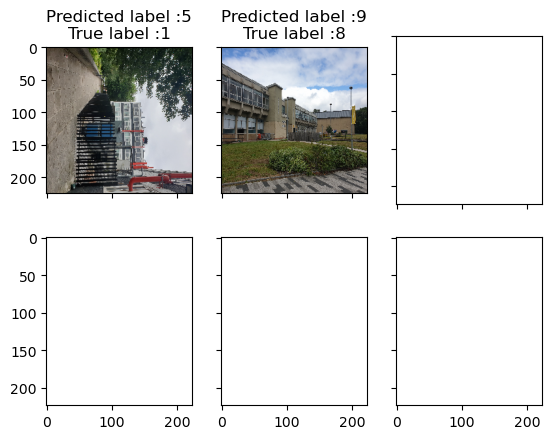

In [44]:

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
x_val_errors = x_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, x_val_errors, Y_pred_classes_errors, Y_true_errors)